In [24]:
import pandas as pd

In [25]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
data=pd.read_csv('Sales.csv',encoding='latin1')

In [27]:
data

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


In [28]:
data.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [29]:
data.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [32]:
data.drop(['ADDRESSLINE1','ADDRESSLINE2','CITY','STATE','POSTALCODE','TERRITORY','CONTACTLASTNAME','CONTACTFIRSTNAME','STATUS','ORDERDATE','CUSTOMERNAME','PHONE'],axis=1,inplace=True)

In [33]:
data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,COUNTRY,DEALSIZE
0,10107,30,95.70,2,2871.00,1,2,2003,Motorcycles,95,S10_1678,USA,Small
1,10121,34,81.35,5,2765.90,2,5,2003,Motorcycles,95,S10_1678,France,Small
2,10134,41,94.74,2,3884.34,3,7,2003,Motorcycles,95,S10_1678,France,Medium
3,10145,45,83.26,6,3746.70,3,8,2003,Motorcycles,95,S10_1678,USA,Medium
4,10159,49,100.00,14,5205.27,4,10,2003,Motorcycles,95,S10_1678,USA,Medium


In [34]:
dealsize=pd.get_dummies(data['DEALSIZE'])

In [35]:
country=pd.get_dummies(data['COUNTRY'])

In [36]:
productline=pd.get_dummies(data['PRODUCTLINE'])

In [37]:
dealsize

,Large,Medium,Small
0,False,False,True
1,False,False,True
2,False,True,False
3,False,True,False
4,False,True,False
...,...,...,...
2818,False,False,True
2819,False,True,False
2820,False,True,False
2821,False,False,True


In [38]:
country

,Australia,Austria,Belgium,Canada,Denmark,Finland,France,Germany,Ireland,Italy,Japan,Norway,Philippines,Singapore,Spain,Sweden,Switzerland,UK,USA
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
2819,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
2820,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
2821,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False


In [39]:
productline

,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars
0,False,True,False,False,False,False,False
1,False,True,False,False,False,False,False
2,False,True,False,False,False,False,False
3,False,True,False,False,False,False,False
4,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...
2818,False,False,False,True,False,False,False
2819,False,False,False,True,False,False,False
2820,False,False,False,True,False,False,False
2821,False,False,False,True,False,False,False


In [40]:
data=pd.concat([data,dealsize,country,productline],axis=1)

In [41]:
data.shape

(2823, 42)

In [42]:
data=data.drop(['DEALSIZE','COUNTRY','PRODUCTLINE'],axis=1)

In [43]:
data.shape

(2823, 39)

In [44]:
data['PRODUCTCODE']=pd.Categorical(data['PRODUCTCODE']).codes

In [45]:
data.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551,53.773291
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912,31.585298
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000,0.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000,27.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000,53.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000,81.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000,108.000000


In [46]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ORDERNUMBER,2823.0,10258.725115,92.085478,10100.00,10180.00,10262.0,10333.5,10425.0
QUANTITYORDERED,2823.0,35.092809,9.741443,6.00,27.00,35.0,43.0,97.0
PRICEEACH,2823.0,83.658544,20.174277,26.88,68.86,95.7,100.0,100.0
ORDERLINENUMBER,2823.0,6.466171,4.225841,1.00,3.00,6.0,9.0,18.0
SALES,2823.0,3553.889072,1841.865106,482.13,2203.43,3184.8,4508.0,14082.8
QTR_ID,2823.0,2.717676,1.203878,1.00,2.00,3.0,4.0,4.0
MONTH_ID,2823.0,7.092455,3.656633,1.00,4.00,8.0,11.0,12.0
YEAR_ID,2823.0,2003.815090,0.699670,2003.00,2003.00,2004.0,2004.0,2005.0
MSRP,2823.0,100.715551,40.187912,33.00,68.00,99.0,124.0,214.0
PRODUCTCODE,2823.0,53.773291,31.585298,0.00,27.00,53.0,81.0,108.0


In [47]:
from sklearn.cluster import KMeans

In [57]:
disortion=[]
k=range(1,10)
for n in k:
    km=KMeans(n_clusters=n)
    km.fit(data)
    disortion.append(km.inertia_)

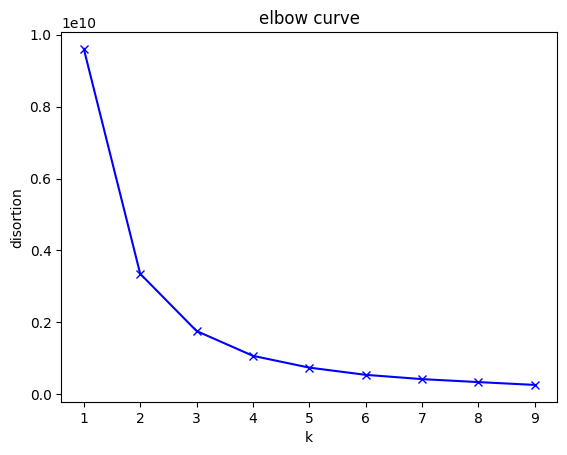

In [58]:
plt.plot(k,disortion,'-bx')
plt.xlabel('k')
plt.ylabel('disortion')
plt.title('elbow curve')
plt.show()

In [59]:
x=data.values
model=KMeans(n_clusters=4,random_state=2)
model.fit(x)
pred=model.predict(x)

In [60]:
print(pred)

[2 2 2 ... 1 0 2]


In [62]:
unique,count=np.unique(pred,return_counts=True)

In [63]:
print(unique)

[0 1 2 3]


In [64]:
print(count)

[1076  539 1015  193]


In [65]:
data_pred=pd.DataFrame(pred)

In [66]:
data=pd.concat([data,data_pred],axis=1)

In [67]:
data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,...,UK,USA,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,0
0,10107,30,95.70,2,2871.00,1,2,2003,95,0,...,False,True,False,True,False,False,False,False,False,2
1,10121,34,81.35,5,2765.90,2,5,2003,95,0,...,False,False,False,True,False,False,False,False,False,2
2,10134,41,94.74,2,3884.34,3,7,2003,95,0,...,False,False,False,True,False,False,False,False,False,2
3,10145,45,83.26,6,3746.70,3,8,2003,95,0,...,False,True,False,True,False,False,False,False,False,2
4,10159,49,100.00,14,5205.27,4,10,2003,95,0,...,False,True,False,True,False,False,False,False,False,1


In [69]:
data.shape

(2823, 40)

In [70]:
print(model.cluster_centers_)

[[ 1.02591011e+04  3.00473098e+01  6.59708349e+01  6.66233766e+00
   1.91293776e+03  2.72541744e+00  7.12708720e+00  2.00381818e+03
   7.39656772e+01  6.32736549e+01  1.38777878e-17  7.77156117e-16
   1.00000000e+00  7.23562152e-02  1.85528757e-02  1.39146568e-02
   2.87569573e-02  1.85528757e-02  2.96846011e-02  1.18738404e-01
   2.13358071e-02  6.49350649e-03  4.26716141e-02  1.76252319e-02
   3.24675325e-02  7.42115028e-03  2.78293135e-02  1.21521336e-01
   1.76252319e-02  6.49350649e-03  5.38033395e-02  3.44155844e-01
   2.59740260e-01  1.20593692e-01  1.22448980e-01  9.18367347e-02
   4.26716141e-02  8.99814471e-02  2.72727273e-01]
 [ 1.02578678e+04  4.08789572e+01  9.97211546e+01  6.37988827e+00
   5.36869875e+03  2.71694600e+00  7.06331471e+00  2.00381192e+03
   1.27774674e+02  4.05716946e+01  2.08166817e-17  1.00000000e+00
  -6.10622664e-16  6.70391061e-02  2.04841713e-02  1.11731844e-02
   2.04841713e-02  2.23463687e-02  2.97951583e-02  9.86964618e-02
   1.86219739e-02  5.5865

In [71]:
data2=data.drop(columns=[0],axis=1)

In [73]:
cc=pd.DataFrame(data=model.cluster_centers_,columns=[data2.columns])

In [74]:
print(cc)

    ORDERNUMBER QUANTITYORDERED  PRICEEACH ORDERLINENUMBER        SALES  \
0  10259.101113       30.047310  65.970835        6.662338  1912.937755   
1  10257.867784       40.878957  99.721155        6.379888  5368.698752   
2  10256.123153       35.205911  90.869675        6.499507  3486.515429   
3  10272.694301       46.580311  99.836943        5.435233  8024.236062   

     QTR_ID  MONTH_ID      YEAR_ID        MSRP PRODUCTCODE  ... Switzerland  \
0  2.725417  7.127087  2003.818182   73.965677   63.273655  ...    0.006494   
1  2.716946  7.063315  2003.811918  127.774674   40.571695  ...    0.018622   
2  2.725123  7.121182  2003.793103  104.577340   55.500493  ...    0.012808   
3  2.637306  6.829016  2003.922280  154.528497   28.357513  ...    0.005181   

         UK       USA Classic Cars Motorcycles    Planes     Ships    Trains  \
0  0.053803  0.344156     0.259740    0.120594  0.122449  0.091837  0.042672   
1  0.042831  0.357542     0.446927    0.100559  0.063315  0.039106  